# Project: Investigate a Dataset - No Show Data Set
Mohammed Alsuhaibani
m.alsuhai@gmail.com

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this document we will be analysing the no-show dataset to see what insights we can get from it. Below are the questions we will be trying to answer.

### Questions:


1-What is the time where most no-shows happen?


2-Does not having a subsidy mean higher rate of showing up?


In [408]:
#import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section we will be taking a look at dataset and check if there is anything that needs to be modified or cleansed 

### General Properties

In [409]:
#Use pd.read_csv to import csv as a pandas dataframe
df = pd.read_csv('noshowappointments.csv')

In [410]:
# First five rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [411]:
#Brief on all the fields of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


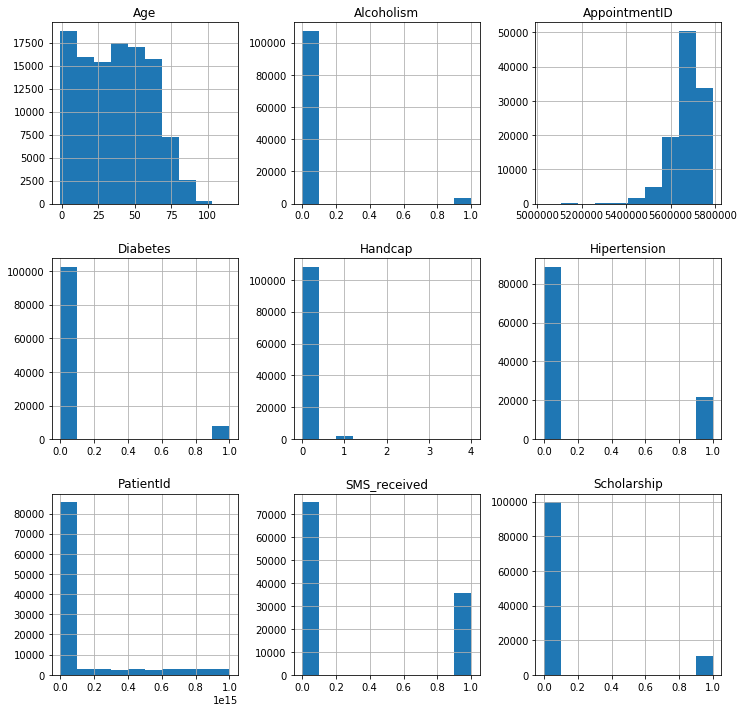

In [412]:
#histogram of all the fields 
df.hist(figsize=(12,12));

In [413]:
#Staistical analysis of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [414]:
#Checking for any null values 
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

### Looking at the datset, it seems we have some multiple things we need to fix:
>* Looking at the cloumns, it's best we standardize their format
>* The date fields need to be converted to datetime
>* The min and max Age look a bit wierd, especially the min age
>* We won't need all the fields so we will be dropping the fields that we won't be using

###### Fortunatley, there are no null values in the dataset



### Data Cleaning

>In this part we will be cleansing and preparing the dataset for the anlysis



In [415]:
#Dropping unnedded columns
df.drop(['PatientId','AppointmentID','AppointmentDay','Neighbourhood','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','Age'],axis=1,inplace=True)


In [416]:
#Standardizing the format of the columns (Lower case, changing hyphen to underscore
#and adding underscore to combined words)
df.rename(columns=lambda a: a.lower().replace('-','_'),inplace=True)
df.rename(columns={'scheduledday':'scheduled_day'},inplace=True)

In [417]:
#Changing the 'scheduled_day' to datetime
df['scheduled_day']= pd.to_datetime(df['scheduled_day'])

In [418]:
#To make sure all the changes have been applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   gender         110527 non-null  object             
 1   scheduled_day  110527 non-null  datetime64[ns, UTC]
 2   scholarship    110527 non-null  int64              
 3   no_show        110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 3.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> in this part we start analyzing the prepared dataset to try and answer our questions


### 1-What is the time of day where most no-shows happen?

We want to know what time of day has the most no-shows. So we first create a mask for each time of day as follows:
>* emorning (Early Morning) = 00:00 - 06:00
* morning (Morning) = 06:00 - 12:00
* afternoon (Afternon) = 12:00 - 17:00
* evening (Evening) = 17:00 - 21:00
* night (Night) = 17:00 - 21:00


In [419]:
#Masks for time of Day
emorning = (df['scheduled_day'].dt.time <= datetime.time(6,00,00)) 
morning = (df['scheduled_day'].dt.time <= datetime.time(12,00,00)) & (df['scheduled_day'].dt.time > datetime.time(6,00,00)) 
afternoon = (df['scheduled_day'].dt.time <= datetime.time(17,00,00)) & (df['scheduled_day'].dt.time > datetime.time(12,00,00)) 
evening = (df['scheduled_day'].dt.time <= datetime.time(21,00,00)) & (df['scheduled_day'].dt.time > datetime.time(17,00,00)) 
night = (df['scheduled_day'].dt.time <= datetime.time(23,59,59)) & (df['scheduled_day'].dt.time > datetime.time(21,00,00)) 

len(df[emorning]),len(df[morning]),len(df[afternoon]),len(df[evening]),len(df[night])

(0, 68482, 37206, 4836, 3)

##### It seems that that are no appointments in the early morning period, so it will be disregarded from here on

In [420]:
#To make sure that the mask lengths and df length are the same
len(df[morning])+len(df[afternoon])+len(df[evening])+len(df[night])== len(df)


True

##### Here we are going to create a column for time of day and add the time of day based on the masks we created so we can analyse the dataset more easily

In [421]:
df.loc[morning,'tod'] = 'morning'
df.loc[afternoon,'tod'] = 'afternoon'
df.loc[evening,'tod'] = 'evening'
df.loc[night,'tod'] = 'night'


In [422]:
#To make sure the column is populated
df['tod'].unique()

array(['evening', 'afternoon', 'morning', 'night'], dtype=object)

##### I am quereying the dataset on the no-shows based on the time of day

In [423]:
y= df.query('no_show == "Yes"').groupby(['tod'])['gender'].count()
y

tod
afternoon     8255
evening       1151
morning      12912
night            1
Name: gender, dtype: int64

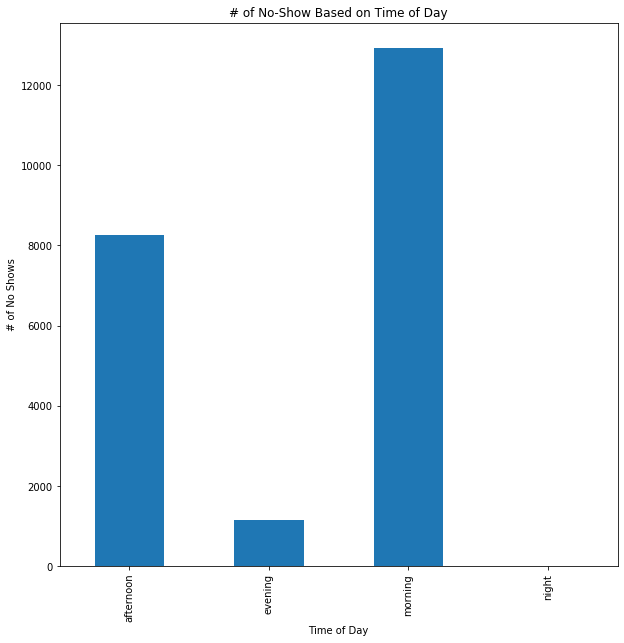

In [424]:
#visualising it in a bar diagram
y.plot.bar(figsize=(10,10))
plt.title('# of No-Show Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('# of No Shows');

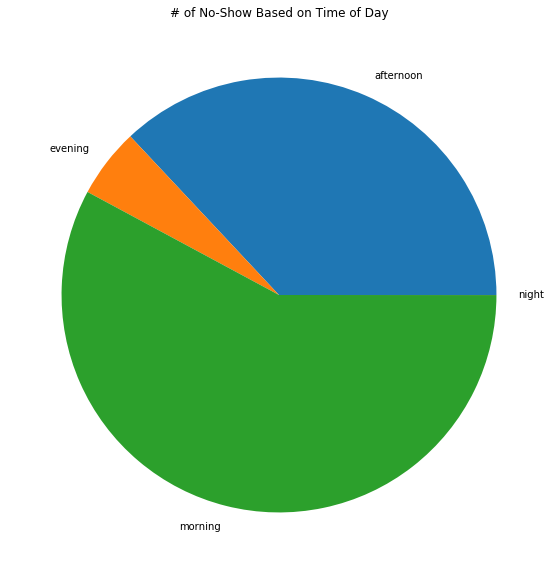

In [425]:
#Visualizing it in a pie chart
y.plot.pie(figsize=(10,10))
plt.title('# of No-Show Based on Time of Day');
plt.ylabel('');

#### As seen above it seems the majority of the no-shows occur in morning. If we want to see the percentage of no shows for each time period, we will calculate the proportion and visualize it in another bar diagram

In [426]:
totals =  df.groupby(['tod'])['gender'].count()
prop = y/totals
prop

tod
afternoon    0.221873
evening      0.238007
morning      0.188546
night        0.333333
Name: gender, dtype: float64

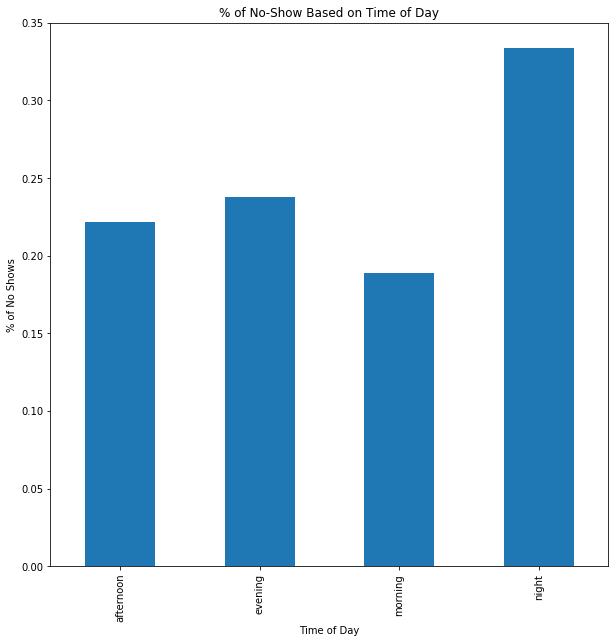

In [427]:
prop.plot.bar(figsize=(10,10))
plt.title('% of No-Show Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('% of No Shows');

#### It seems that the evening time is by far the highest in terms of percentage of no-shows with a third of all appointments being no-shows

### 2-Does not having a a scholarship (subsidy) mean higher rate of showing up?

#### For this question I want to see whether or not having a scholarship (subsidized appointment) has an influence on showing up to the appointment. My hypothesis is that people who pay for the appointments without it being subsidized will tend to be more careful in coming to appointments


In [428]:
# Querying the dataset on the no-shows based on having a scolrship or not
s = df.query('no_show == "Yes"').groupby(['scholarship'])['gender'].count()
s

scholarship
0    19741
1     2578
Name: gender, dtype: int64

#### Let's look at how that will look in terms of percentatages to all the appointments

In [429]:
totalss =  df.groupby(['scholarship'])['gender'].count()
props = s / totalss
props


scholarship
0    0.198072
1    0.237363
Name: gender, dtype: float64

#### We can see that  the people with a scholraship have a slighty higher percentage of not showing up. Let's visualize this in a bar chart

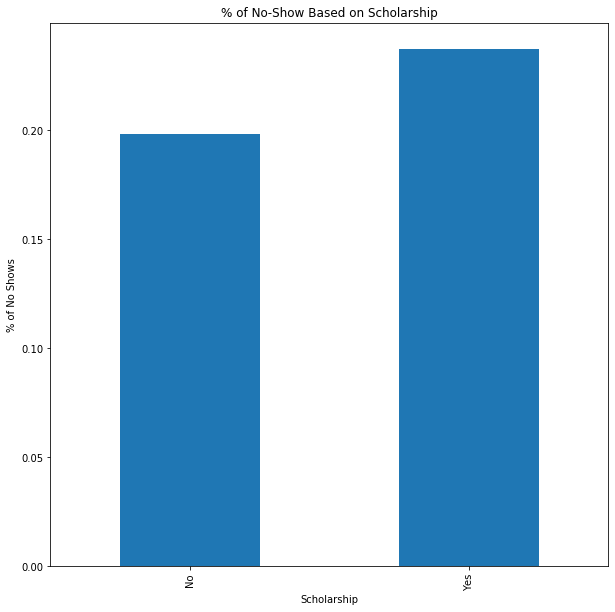

In [431]:
props.plot.bar(figsize=(10,10))
plt.title('% of No-Show Based on Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('% of No Shows')
plt.xticks([0,1],['No','Yes']);

#### The visualization shows that percentage of no shows for appointments with no scholarship is slightly lower than that of appointments with a scholarship

<a id='conclusions'></a>
## Conclusions



#### In conclusion we have seen that the majority of the no shows are in the morning period, and the fact that the appointment is  subsidized (scholarship) may lead to a higher rate in no-shows. I believe there was limitation in terms of demographic data of the patients that would have given us more insights and correlations with no showing.